In [58]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from tabulate import tabulate

In [60]:
# Daha geniş bir çıktı formatı için ayarlar
pd.set_option('display.width', 1000)  # Çıktı genişliğini artır
pd.set_option('display.max_columns', None)  # Tüm sütunları göster
pd.set_option('display.max_rows', 100)  # Tüm satırları göster (isteğe bağlı)
pd.set_option("display.max_colwidth", 20)  # Her sütundaki hücre genişliğini sınırla

# CSV dosyasının yolu
csv_path = "C:\\Users\\ennur\\OneDrive\\Masaüstü\\adult.csv"

# CSV dosyasını pandas ile oku
df = pd.read_csv(csv_path, delimiter=',')


# Veri setindeki sütunların adlarını görüntüle
print("\nVeri setindeki sütun adları:")
print(df.columns)

# Veri setindeki özellik sayısını yazdırma
print("\nÖzellik sayısı:")
print(df.shape[1])  # Sütun sayısı


# Veri setinin ilk 5 satırını görüntüle
print(df.head())

# Veri setinin boyutlarını (satır, sütun sayısı) görüntüle
print("\nVeri seti boyutu (satır, sütun):")
print(df.shape)


# Veri setindeki her bir sütunun veri türünü inceleyin
print("\nVeri türleri:")
print(tabulate(df.dtypes.reset_index(), headers=["Sütun", "Veri Türü"], tablefmt='fancy_grid'))

# Sınıf dağılımını (hedef değişken) görüntüle (eğer hedef değişken varsa, örn. 'income' gibi)
if 'income' in df.columns:
    print("\nSınıf dağılımı (income):")
    print(df['income'].value_counts())
else:
   print("\nHedef değişken 'income' bulunamadı.")


Veri setindeki sütun adları:
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income'], dtype='object')

Özellik sayısı:
15
   age workclass  fnlwgt     education  education.num marital.status         occupation   relationship   race     sex  capital.gain  capital.loss  hours.per.week native.country income
0   90         ?   77053       HS-grad              9        Widowed                  ?  Not-in-family  White  Female             0          4356              40  United-States  <=50K
1   82   Private  132870       HS-grad              9        Widowed    Exec-managerial  Not-in-family  White  Female             0          4356              18  United-States  <=50K
2   66         ?  186061  Some-college             10        Widowed                  ?      Unmarried  Black  Female             0          4356              40  United-Sta

In [62]:

# Veri setindeki '?' karakterlerini NaN ile değiştir
df.replace('?', pd.NA, inplace=True)

# Tüm eksik değerleri np.nan ile değiştir
df = df.replace({pd.NA: np.nan})

# Eksik veriler öncesi ilk 10 satırı yazdıralım
print("Eksik veriler öncesi ilk 10 satır:")
print(df.head(10))

# Sayısal veriler için SimpleImputer kullanarak eksik verileri ortalama ile doldur
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Sayısal sütunları seçiyoruz
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Eksik verileri sayısal sütunlarda dolduruyoruz
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Kategorik veriler için SimpleImputer kullanarak eksik verileri en yaygın değer ile doldur
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Kategorik sütunları seçiyoruz
categorical_columns = df.select_dtypes(include=[object]).columns

# Eksik verileri kategorik sütunlarda dolduruyoruz
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

# Doldurma işleminden sonra veri setinin ilk 10 satırını yazdıralım
print("\nEksik veriler sonrası ilk 10 satır:")
print(df.head(10))

Eksik veriler öncesi ilk 10 satır:
   age    workclass  fnlwgt     education  education.num marital.status         occupation    relationship   race     sex  capital.gain  capital.loss  hours.per.week native.country income
0   90          NaN   77053       HS-grad              9        Widowed                NaN   Not-in-family  White  Female             0          4356              40  United-States  <=50K
1   82      Private  132870       HS-grad              9        Widowed    Exec-managerial   Not-in-family  White  Female             0          4356              18  United-States  <=50K
2   66          NaN  186061  Some-college             10        Widowed                NaN       Unmarried  Black  Female             0          4356              40  United-States  <=50K
3   54      Private  140359       7th-8th              4       Divorced  Machine-op-inspct       Unmarried  White  Female             0          3900              40  United-States  <=50K
4   41      Private  2646

In [64]:
# Sayısal sütunları seçiyoruz
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Hangi sütunların seçildiğini ve türlerini kontrol ediyoruz
print("Sayısal sütunlar:", numeric_columns)  # Sayısal sütun isimleri
print("Sütun türleri:")
print(df[numeric_columns].dtypes)  # Türlerini kontrol et

# Kategorik sütunları seçiyoruz
categorical_columns = df.select_dtypes(include=[object]).columns
print("\nKategorik Sütunlar:")
print(categorical_columns)

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

 # Boş satır ekleyerek arayı açıyoruz
print("\n" + "-"*40 + "\n")  # 40 karakterlik bir ayırıcı çizgi 

# Yeni sütunların isimlerini görmek  # kategorik için doğru çalışıyor.
print(df_encoded.columns)

Sayısal sütunlar: Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'], dtype='object')
Sütun türleri:
age               float64
fnlwgt            float64
education.num     float64
capital.gain      float64
capital.loss      float64
hours.per.week    float64
dtype: object

Kategorik Sütunlar:
Index(['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income'], dtype='object')

----------------------------------------

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       ...
       'native.country_Scotland', 'native.country_South', 'native.country_Taiwan', 'native.country_Thailand', 'native.country_Trinadad&Tobago', 'native.country_United-States', 'native.country_Vietnam', 'native.country_Yugoslavia', 'income_<=50K', 'income_>50K'], dtype='object', length=1

In [66]:
# Yaş aralığı oluşturma (18-25, 26-35, 36-45, ...)
# Yaş aralığı sınıflandırma fonksiyonu
def categorize_age(age):
    if age <= 18:
        return '0-18'
    elif 19 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 35:
        return '26-35'
    elif 36 <= age <= 45:
        return '36-45'
    elif 46 <= age <= 55:
        return '46-55'
    elif 56 <= age <= 65:
        return '56-65'
    elif 66 <= age <= 75:
        return '66-75'
    else:
        return '76+'

# Yaş sütununu kullanarak yaş aralığı ekleyelim
df['age_group'] = df['age'].apply(categorize_age)

# Normalizasyon yapılmış veriyi orijinal ölçeğe dönüştürmek gerekebilir.
max_hours = 100  # Varsayılan maksimum çalışma saati
df['original_hours'] = df['hours.per.week'] * max_hours
# 'original_hours' hesaplamasına gerek yoksa, direkt 'hours.per.week' ile 'work_status' oluşturun
df['work_status'] = df['hours.per.week'].apply(lambda x: 'full-time' if x >= 40 else 'part-time')
df['high_school_or_less'] = df['education'].apply(lambda x: 1 if x in ['Bachelors', 'Masters', 'Doctorate', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'HS-grad'] else 0)
# Sütun adını değiştirme
df.rename(columns={'high_school_or_less': 'hs_grad_and_above'}, inplace=True)

# Veri setindeki sütun isimlerini yazdır
#print(df.columns.tolist())

# Yaş ve yaş gruplarının ilk 10 satırını görüntüle
print("Yaş ve Yaş Gruplarının İlk 10 Satırı:")
print(df[['age', 'age_group']].head(10))

# Yaş gruplarının dağılımını kontrol et
print("\nYaş Gruplarının Dağılımı:")
print(df['age_group'].value_counts())

# Yaş grubu istatistiklerini incele
print("\nYaş Gruplarının İstatistiksel Özellikleri:")
print(df['age_group'].describe())

 # Boş satır ekleyerek arayı açıyoruz
print("\n" + "-"*40 + "\n")  # 40 karakterlik bir ayırıcı çizgi 

# Haftalık çalışma saati ve çalışma durumu (work_status) ilk 10 satırını görüntüle
print("Haftalık Çalışma Saati ve Çalışma Durumu (İlk 10 Satır):")
print(df[['hours.per.week', 'work_status']].head(10))

# Çalışma durumu (work_status) dağılımını kontrol et
print("\nÇalışma Durumu Dağılımı:")
print(df['work_status'].value_counts())
# Çalışma durumu istatistiklerini incele
print("\nÇalışma Durumu İstatistiksel Özellikleri:")
print(df['work_status'].describe())

 # Boş satır ekleyerek arayı açıyoruz
print("\n" + "-"*40 + "\n")  # 40 karakterlik bir ayırıcı çizgi 

# Eğitim durumu ve lisans veya daha düşük eğitim durumu (high_school_or_less) ilk 10 satırını görüntüle
print("Eğitim Durumu ve Lisans veya Daha Düşük Eğitim Durumu (İlk 10 Satır):")
print(df[['education', 'hs_grad_and_above']].head(10))

# Lise veya daha düşük eğitim durumu (high_school_or_less) dağılımını kontrol et
print("\nLisans veya Daha Düşük Eğitim Durumu Dağılımı:")
print(df['hs_grad_and_above'].value_counts())

# Lise veya daha düşük eğitim durumu istatistiklerini incele
print("\nLisans Daha Düşük Eğitim Durumu İstatistiksel Özellikleri:")
print(df['hs_grad_and_above'].describe())

Yaş ve Yaş Gruplarının İlk 10 Satırı:
    age age_group
0  90.0       76+
1  82.0       76+
2  66.0     66-75
3  54.0     46-55
4  41.0     36-45
5  34.0     26-35
6  38.0     36-45
7  74.0     66-75
8  68.0     66-75
9  41.0     36-45

Yaş Gruplarının Dağılımı:
age_group
26-35    8514
36-45    8009
46-55    5538
18-25    5466
56-65    2931
0-18      945
66-75     917
76+       241
Name: count, dtype: int64

Yaş Gruplarının İstatistiksel Özellikleri:
count     32561
unique        8
top       26-35
freq       8514
Name: age_group, dtype: object

----------------------------------------

Haftalık Çalışma Saati ve Çalışma Durumu (İlk 10 Satır):
   hours.per.week work_status
0            40.0   full-time
1            18.0   part-time
2            40.0   full-time
3            40.0   full-time
4            40.0   full-time
5            45.0   full-time
6            40.0   full-time
7            20.0   part-time
8            40.0   full-time
9            60.0   full-time

Çalışma Durumu Dağı

In [68]:
# Bağımsız değişkenler (X) ve hedef değişken (y)
X = df.drop(columns=['income'])  # 'income' dışındaki sütunlar
y = df['income']  # Hedef değişken

print(X.shape)  # Bağımsız değişkenlerin boyutunu yazdırır
print(y.shape)  # Hedef değişkenin boyutunu yazdırır

#print(X.head())  # Bağımsız değişkenlerin ilk 5 satırını yazdırır
#print(y.head())  # Hedef değişkenin ilk 5 satırını yazdırır

# Hedef değişken
y = df['income']

# Bağımsız değişkenlerden hedef sütunu çıkar ve yalnızca sayısal sütunları kullan
X = df.drop(columns=['income']).select_dtypes(include=[np.number])



(32561, 18)
(32561,)


In [70]:
#normalizasyon
numeric_columns = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

#normalizasyon kontrolü  doğru çalışıyor.
print(df[numeric_columns].describe())

                age        fnlwgt  education.num  capital.gain  capital.loss  hours.per.week        income  original_hours  hs_grad_and_above
count  32561.000000  32561.000000   32561.000000  32561.000000  32561.000000    32561.000000  32561.000000    32561.000000       32561.000000
mean       0.295639      0.120545       0.605379      0.010777      0.020042        0.402423      0.240810        0.402423           0.869384
std        0.186855      0.071685       0.171515      0.073854      0.092507        0.125994      0.427581        0.125994           0.336986
min        0.000000      0.000000       0.000000      0.000000      0.000000        0.000000      0.000000        0.000000           0.000000
25%        0.150685      0.071679       0.533333      0.000000      0.000000        0.397959      0.000000        0.397959           1.000000
50%        0.273973      0.112788       0.600000      0.000000      0.000000        0.397959      0.000000        0.397959           1.000000
75%   

In [72]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lasso (L1) regresyon modeli
lasso_model = Lasso()  # Alpha parametresi GridSearchCV ile belirlenecek

# Parametre arama alanı (alpha değeri)
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # Lasso'nun 'alpha' parametresi
}
# GridSearchCV ile en iyi parametreyi bul
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5)

# GridSearchCV'yi eğitim verileriyle fit et
grid_search.fit(X_train, y_train)

# En iyi parametreyi yazdır
print("\nEn İyi Parametreler:")
print("Best parameters:", grid_search.best_params_)

# En iyi parametrelerle modelin en iyi versiyonunu al
best_lasso_model = grid_search.best_estimator_

# Modelin test verisi üzerindeki performansını değerlendirin
y_pred = best_lasso_model.predict(X_test)

# Hata hesaplama
print("\nHata Hesaplama (Mean Squared Error - MSE):")
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Modelin katsayılarını inceleyin
print("\nModel Katsayılarını İnceleme:")
print("Model Coefficients:", best_lasso_model.coef_)

# Model katsayılarını ve özellik isimlerini eşleştir
print("\nModel Katsayıları ve Özellik İsimlerini Eşleştirme:")
coefficients = best_lasso_model.coef_
feature_names = X.columns  # Özellik isimleri (X'in sütun isimleri)

# Katsayılar ve özellikleri yazdır
print("\nKatsayılar ve Özellikler:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


En İyi Parametreler:
Best parameters: {'alpha': 0.001}

Hata Hesaplama (Mean Squared Error - MSE):
Mean Squared Error (MSE): 0.13991148469572523

Model Katsayılarını İnceleme:
Model Coefficients: [ 6.11073941e-03  9.87825322e-08  5.47819780e-02  9.44008517e-06
  1.20316256e-04  5.20611393e-03  1.03178417e-06 -9.73763091e-02]

Model Katsayıları ve Özellik İsimlerini Eşleştirme:

Katsayılar ve Özellikler:
age: 0.006110739412850038
fnlwgt: 9.878253221547276e-08
education.num: 0.05478197802053457
capital.gain: 9.440085170383095e-06
capital.loss: 0.0001203162559150803
hours.per.week: 0.005206113932913073
original_hours: 1.0317841712085373e-06
hs_grad_and_above: -0.097376309087832


In [74]:
# Sınıf dağılımını kontrol et
print("Sınıf Dağılımı:")
print(df['income'].value_counts())

#Sınıf dağılımı şu şekilde:
#0 (<=50K) sınıfı: 24,720 örnek
#1 (>50K) sınıfı: 7,841 örnek

 # Boş satır ekleyerek arayı açıyoruz
print("\n" + "-"*40 + "\n")  # 40 karakterlik bir ayırıcı çizgi 


# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SMOTE dengelemesi
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Dengelemeden sonra sınıf dağılımını kontrol et
print("\nDengelemeden sonra sınıf dağılımı:")
print(pd.Series(y_res).value_counts())

Sınıf Dağılımı:
income
0.0    24720
1.0     7841
Name: count, dtype: int64

----------------------------------------


Dengelemeden sonra sınıf dağılımı:
income
0    17291
1    17291
Name: count, dtype: int64


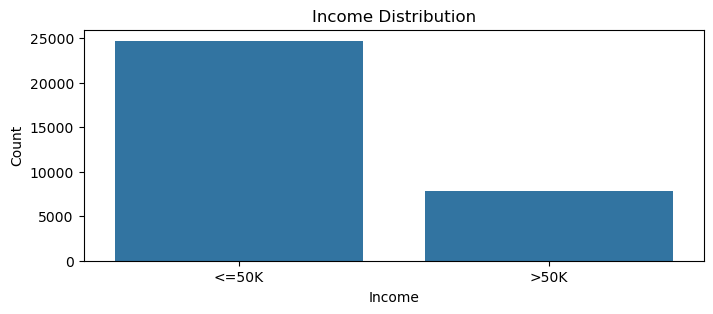

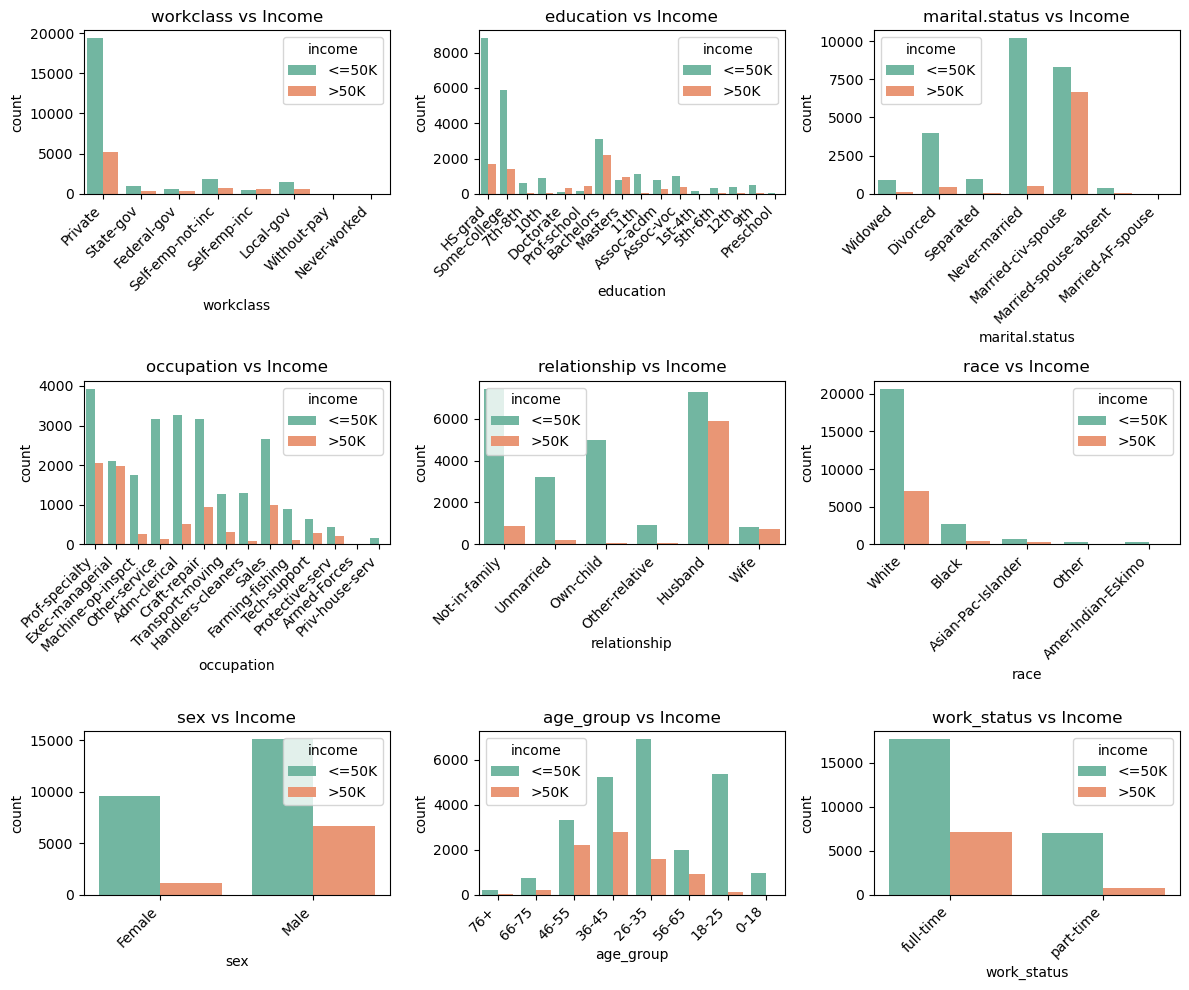

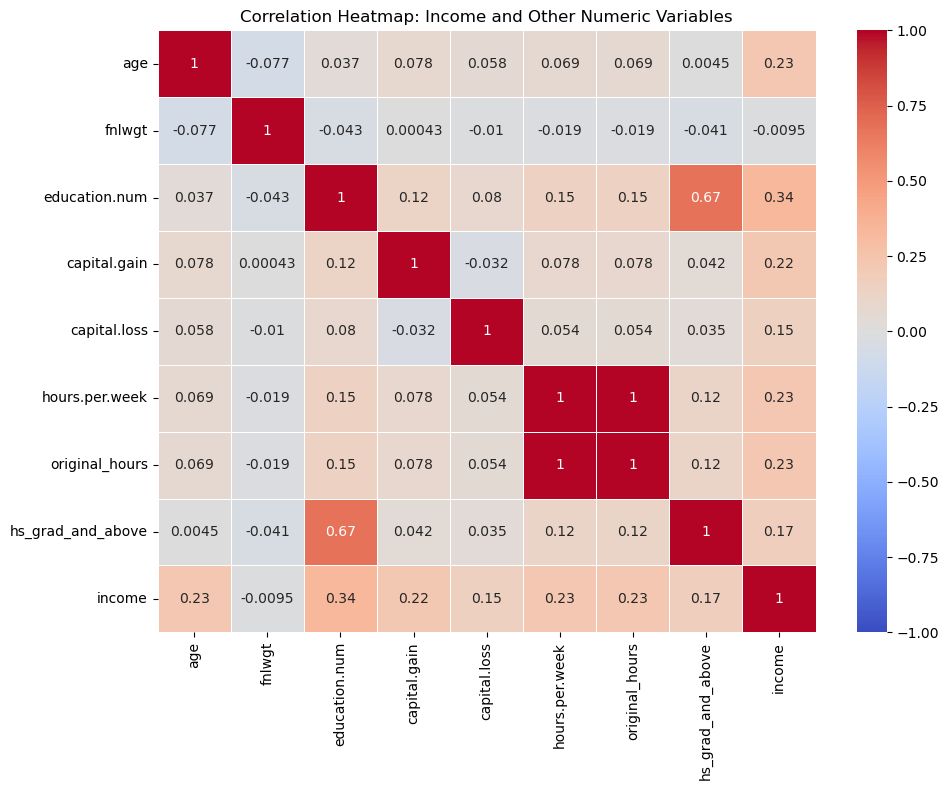

In [76]:
# 'income' sütunundaki sayısal değerleri <=50K ve >50K olarak yeniden adlandırma
df['income'] = df['income'].map({0: '<=50K', 1: '>50K'})

# Plot income distribution
plt.figure(figsize=(8, 3))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


# Kategorik değişkenler için income ile ilişkiyi bar grafiği ile gösterelim
categorical_columns = df.select_dtypes(include=[object]).columns
categorical_columns = [col for col in categorical_columns if col != 'income' and col != 'native.country']  # 'income' ve 'native.country' hariç

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # 3 satır, 3 sütunlu bir yapı
    sns.countplot(data=df, x=col, hue='income', palette='Set2')
    plt.title(f'{col} vs Income')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 'income' sütunundaki sayısal değerleri 0 (<=50K) ve 1 (>50K) olarak değiştirme
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Sayısal değişkenler arasındaki korelasyonu hesaplayalım
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = [col for col in numeric_columns if col != 'income']  # 'income'ı sayısal kolonlardan çıkarıyoruz

# Korelasyon matrisi oluşturma
correlation_matrix = df[numeric_columns + ['income']].corr()

# Korelasyon matrisi üzerinde heatmap oluşturma
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap: Income and Other Numeric Variables')
plt.tight_layout()
plt.show()

In [77]:
from sklearn.model_selection import StratifiedKFold

# Veriyi eğitim ve test setlerine ayırma
smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Fold Cross Validation için Stratified KFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression Modeli
logistic_model = LogisticRegression(random_state=42)
logistic_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']}
logistic_search = GridSearchCV(logistic_model, logistic_params, cv=cv, n_jobs=-1)
logistic_search.fit(X_train_scaled, y_train)
logistic_best_model = logistic_search.best_estimator_

# Model değerlendirmesi
logistic_y_pred = logistic_best_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, logistic_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, logistic_y_pred))

Logistic Regression Accuracy: 0.8177

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7429
           1       0.72      0.39      0.51      2340

    accuracy                           0.82      9769
   macro avg       0.77      0.67      0.70      9769
weighted avg       0.81      0.82      0.80      9769


Confusion Matrix:
[[7064  365]
 [1416  924]]


KNN Accuracy: 0.8142
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9}

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7429
           1       0.67      0.45      0.53      2340

    accuracy                           0.81      9769
   macro avg       0.76      0.69      0.71      9769
weighted avg       0.80      0.81      0.80      9769


Confusion Matrix:
[[6911  518]
 [1297 1043]]


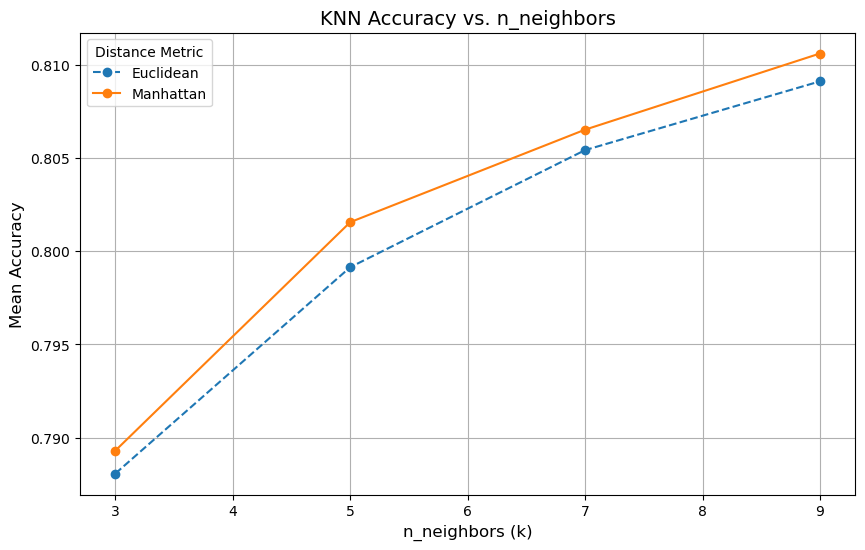

In [78]:
# K-Nearest Neighbors (KNN) Modeli
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
knn_search = GridSearchCV(knn_model, knn_params, cv=cv, n_jobs=-1)
knn_search.fit(X_train_scaled, y_train)
knn_best_model = knn_search.best_estimator_

# Model değerlendirmesi
knn_y_pred = knn_best_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy:.4f}")
# En iyi parametreleri yazdır
print("Best Parameters:", knn_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, knn_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))

# Grafik oluşturmak için GridSearchCV sonuçları
results = knn_search.cv_results_
mean_test_scores = results['mean_test_score']
params = results['param_n_neighbors'].data
metrics = results['param_metric'].data

# Veriyi ayır: Euclidean ve Manhattan
euclidean_scores = [mean_test_scores[i] for i in range(len(metrics)) if metrics[i] == 'euclidean']
manhattan_scores = [mean_test_scores[i] for i in range(len(metrics)) if metrics[i] == 'manhattan']
k_values = sorted(set(params))  # K değerlerini sırala

# Grafik oluşturma
plt.figure(figsize=(10, 6))
# Euclidean
plt.plot(k_values, euclidean_scores, marker='o', label='Euclidean', linestyle='--')

# Manhattan
plt.plot(k_values, manhattan_scores, marker='o', label='Manhattan', linestyle='-')

# Grafik düzenlemeleri
plt.title("KNN Accuracy vs. n_neighbors", fontsize=14)
plt.xlabel("n_neighbors (k)", fontsize=12)
plt.ylabel("Mean Accuracy", fontsize=12)
plt.legend(title="Distance Metric")
plt.grid(True)
plt.show()

In [79]:
# Decision Tree Modeli
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_params = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
dt_search = GridSearchCV(dt_classifier, dt_params, cv=cv, n_jobs=-1)
dt_search.fit(X_train, y_train)
dt_best_model = dt_search.best_estimator_

# Model değerlendirmesi
dt_y_pred = dt_best_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))

Decision Tree Accuracy: 0.8343

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7429
           1       0.72      0.50      0.59      2340

    accuracy                           0.83      9769
   macro avg       0.79      0.72      0.74      9769
weighted avg       0.82      0.83      0.82      9769


Confusion Matrix:
[[6984  445]
 [1174 1166]]


In [81]:
# Random Forest Modeli
rf_classifier = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
rf_search = GridSearchCV(rf_classifier, rf_params, cv=cv, n_jobs=-1)
rf_search.fit(X_train_scaled, y_train)
rf_best_model = rf_search.best_estimator_

# Model değerlendirmesi
rf_y_pred = rf_best_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

Random Forest Accuracy: 0.8370

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7429
           1       0.78      0.44      0.57      2340

    accuracy                           0.84      9769
   macro avg       0.81      0.70      0.73      9769
weighted avg       0.83      0.84      0.82      9769


Confusion Matrix:
[[7140  289]
 [1303 1037]]


In [89]:
# Cross-Validation Performansı
logistic_cv_score = cross_val_score(logistic_best_model, X_train_scaled, y_train, cv=cv)
knn_cv_score = cross_val_score(knn_best_model, X_train_scaled, y_train, cv=cv)
dt_cv_score = cross_val_score(dt_best_model, X_train, y_train, cv=cv)
rf_cv_score = cross_val_score(rf_best_model, X_train_scaled, y_train, cv=cv)
# Skorları ekrana yazdırma
print("Logistic Regression CV Score:", logistic_cv_score)
print("KNN CV Score:", knn_cv_score)
print("Decision Tree CV Score:", dt_cv_score)
print("Random Forest CV Score:", rf_cv_score)

 # Boş satır ekleyerek arayı açıyoruz
print("\n" + "-"*40 + "\n")  # 40 karakterlik bir ayırıcı çizgi 

# Performans sonuçlarını bir dataframe'e döküyoruz
results = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest'],
    'Accuracy': [logistic_accuracy, knn_accuracy, dt_accuracy, rf_accuracy],
    'Recall': [recall_score(y_test, logistic_y_pred), recall_score(y_test, knn_y_pred), recall_score(y_test, dt_y_pred), recall_score(y_test, rf_y_pred)],
    'Precision': [precision_score(y_test, logistic_y_pred), precision_score(y_test, knn_y_pred), precision_score(y_test, dt_y_pred), precision_score(y_test, rf_y_pred)],
    'F1-Score': [f1_score(y_test, logistic_y_pred), f1_score(y_test, knn_y_pred), f1_score(y_test, dt_y_pred), f1_score(y_test, rf_y_pred)]
}

df_results = pd.DataFrame(results)
print(df_results)


Logistic Regression CV Score: [0.81377495 0.81136214 0.8093462  0.81856077 0.81921896]
KNN CV Score: [0.81881992 0.80938802 0.80583589 0.81000439 0.80890742]
Decision Tree CV Score: [0.83220004 0.83307743 0.82645897 0.82492321 0.83501536]
Random Forest CV Score: [0.8376837  0.83176135 0.83106626 0.8295305  0.83918385]

----------------------------------------

                 Model  Accuracy    Recall  Precision  F1-Score
0  Logistic Regression  0.817689  0.394872   0.716835  0.509231
1  K-Nearest Neighbors  0.814208  0.445726   0.668161  0.534735
2        Decision Tree  0.834272  0.498291   0.723774  0.590230
3        Random Forest  0.837036  0.443162   0.782051  0.565739


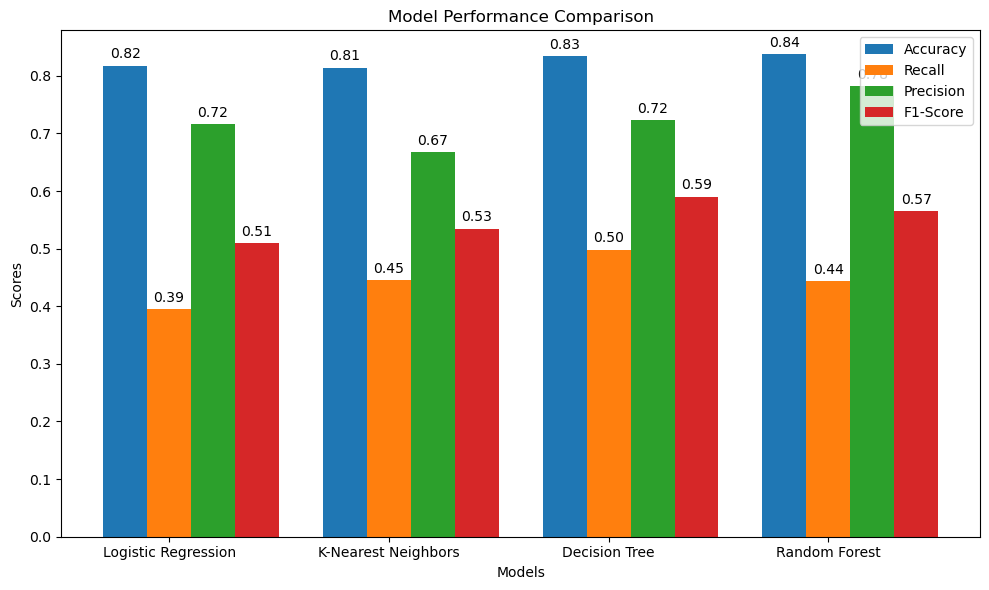

In [83]:
# Performans metrikleri
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest']
accuracy = [logistic_accuracy, knn_accuracy, dt_accuracy, rf_accuracy]
recall = [recall_score(y_test, logistic_y_pred), recall_score(y_test, knn_y_pred), recall_score(y_test, dt_y_pred), recall_score(y_test, rf_y_pred)]
precision = [precision_score(y_test, logistic_y_pred), precision_score(y_test, knn_y_pred), precision_score(y_test, dt_y_pred), precision_score(y_test, rf_y_pred)]
f1 = [f1_score(y_test, logistic_y_pred), f1_score(y_test, knn_y_pred), f1_score(y_test, dt_y_pred), f1_score(y_test, rf_y_pred)]

# Bar chart için yer ayırma
x = np.arange(len(models))  # model sayısı kadar
width = 0.2  # her çubuğun genişliği

fig, ax = plt.subplots(figsize=(10, 6))

# Grafiklerin çizilmesi
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, precision, width, label='Precision')
rects4 = ax.bar(x + 2*width, f1, width, label='F1-Score')

# Etiketlerin eklenmesi
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
# Çubukların üzerine değer yazdırma
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 point vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Etiketleri ekleyelim
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

# Grafiği gösterme
plt.tight_layout()
plt.show()




